In [ ]:
!pip install Embeddings==0.0.8
!pip install np_utils
!pip install scikit-plot
!pip install gensim==3.8.3
!pip install vecstack
import nltk
nltk.download('stopwords')

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Fake news detection
LSTM model
"""
from getEmbeddings import *
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras 
from tensorflow.keras import backend as K
import pandas as pd
import np_utils
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from nntf import *
from sklearn.linear_model import LinearRegression
from vecstack import stacking
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector,Bidirectional
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scikitplot.plotters as skplt
import os
from sklearn.svm import SVC
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from collections import Counter
import matplotlib.pyplot as plt



top_words = 5000
epoch_num = 8
batch_size = 128




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import pickle

In [ ]:
from sklearn.model_selection import train_test_split
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10


path = 'datasets/news_articles.csv'
vector_dimension=300

data = pd.read_csv(path)

missing_rows = []
for i in range(len(data)):
        if data.loc[i, 'text'] != data.loc[i, 'text']:
            missing_rows.append(i)
data = data.drop(missing_rows).reset_index().drop(['index','id'],axis=1)

for i in range(len(data)):
        data.loc[i, 'text'] = cleanup(data.loc[i,'text'])

# data = data.sample(frac=1).reset_index(drop=True)

# x_l = data.loc[:,'text'].values
# y_l = data.loc[:,'label'].values

# xtr, xte, y_train, y_test = train_test_split(
#     x_l, y_l, test_size=1 - train_ratio)
 
# # performing test validation split
# xvl, xte, y_val, y_test = train_test_split(
#     xte, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [ ]:
x = constructLabeledSentences(data['text'])
y = data['label'].values
y = np.where(y=="Real", 0, 1)

text_model = Doc2Vec(min_count=1, window=5, vector_size=vector_dimension, sample=1e-4, negative=5, workers=7, epochs=20,
                         seed=1)
text_model.build_vocab(x)
text_model.train(x, total_examples=text_model.corpus_count, epochs=text_model.epochs)

train_size = int(0.7 * len(x))
test_size = int(0.1 * len(x))
val_size=len(x)-train_size-test_size

text_train_arrays = np.zeros((train_size, vector_dimension))
text_test_arrays = np.zeros((test_size, vector_dimension))
text_val_arrays = np.zeros((val_size, vector_dimension))
train_labels = np.zeros(train_size)
test_labels = np.zeros(test_size)
val_labels = np.zeros(val_size)

for i in range(train_size):
        text_train_arrays[i] = text_model.docvecs['Text_' + str(i)]
        train_labels[i] = y[i]

j = 0
for i in range(train_size, train_size + test_size):
        text_test_arrays[j] = text_model.docvecs['Text_' + str(i)]
        test_labels[j] = y[i]
        j = j + 1
j = 0
for i in range(train_size+test_size, train_size + test_size+val_size):
        text_val_arrays[j] = text_model.docvecs['Text_' + str(i)]
        val_labels[j] = y[i]
        j = j + 1

In [ ]:
model_2=SVC()
with open('keras.sav' , 'rb') as f:
    model_1 = pickle.load(f)
with open('rf.sav' , 'rb') as f:
     model_3 = pickle.load(f)
 
# putting all base model objects in one list
all_models = [model_1, model_2,model_3]

X_train=text_train_arrays
X_val=text_val_arrays
X_test=text_test_arrays
y_train=train_labels
y_val=val_labels
y_test=test_labels

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# training first model
model_1.fit(X_train, y_train)
val_pred_1 = model_1.predict(X_val)
test_pred_1 = model_1.predict(X_test)
 
# converting to dataframe
val_pred_1 = pd.DataFrame(val_pred_1)
test_pred_1 = pd.DataFrame(test_pred_1)
print(val_pred_1)




Train on 1435 samples
1435/1435 [==============================] - 1s 890us/sample - loss: 0.5289 - accuracy: 0.7784
/shared-libs/python3.7/py/lib/python3.7/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
            0
0    0.880540
1    0.778115
2    0.767793
3    0.772157
4    0.769404
..        ...
405  0.839817
406  0.883321
407  0.859573
408  0.949815
409  0.770596

[410 rows x 1 columns]


In [ ]:

print(test_pred_1.shape)
print(val_pred_1.shape)
print(len(x))

(205, 1)
(410, 1)
2050


In [ ]:
# training second model
model_2.fit(X_train, y_train)
val_pred_2 = model_2.predict(X_val)
test_pred_2 = model_2.predict(X_test)
 
# converting to dataframe
val_pred_2 = pd.DataFrame(val_pred_2)
test_pred_2 = pd.DataFrame(test_pred_2)

In [ ]:
# y_train = y_train.reshape((-1, 1)).astype(np.int32)
# y_test = y_test.reshape((-1, 1)).astype(np.int32)
# y_val = y_val.reshape((-1, 1)).astype(np.int32)

In [ ]:
# training second model
model_3.fit(X_train, y_train)
val_pred_3 = model_3.predict(X_val)
test_pred_3 = model_3.predict(X_test)
 
# converting to dataframe
val_pred_3 = pd.DataFrame(val_pred_3)
test_pred_3 = pd.DataFrame(test_pred_3)

In [ ]:
X_val = pd.DataFrame(X_val)
val_pred_1 = pd.DataFrame(val_pred_1)
val_pred_2 = pd.DataFrame(val_pred_2)
val_pred_3 = pd.DataFrame(val_pred_3)
df_val = pd.concat([X_val, val_pred_1, val_pred_2,val_pred_3], axis=1)
#df_val = pd.concat([X_val, val_pred_1, val_pred_2], axis=1)
df_val=np.array(df_val)


In [ ]:
X_test = pd.DataFrame(X_test)
test_pred_1 = pd.DataFrame(test_pred_1)
test_pred_2 = pd.DataFrame(test_pred_2)
test_pred_3 = pd.DataFrame(test_pred_3)
df_test = pd.concat([X_test, test_pred_1, test_pred_2,test_pred_3], axis=1)
#df_test = pd.concat([X_test, test_pred_1, test_pred_2], axis=1)
df_test=np.array(df_test)

In [ ]:
print(df_val)
print(y_val)

[[-2.21243054e-01  1.80885762e-01 -2.81453311e-01 ...  8.80539775e-01
   1.00000000e+00  1.00000000e+00]
 [-2.66095214e-02 -1.06684081e-02 -1.59203988e-02 ...  7.78115392e-01
   1.00000000e+00  7.80000000e-01]
 [-3.61106219e-03 -1.23826484e-03 -3.38624057e-04 ...  7.67793179e-01
   1.00000000e+00  9.60000000e-01]
 ...
 [-5.51071309e-04 -4.32394072e-02  1.69674382e-02 ...  8.59572887e-01
   1.00000000e+00  8.90000000e-01]
 [-1.26682058e-01  1.78461205e-02 -1.74615577e-01 ...  9.49815273e-01
   1.00000000e+00  1.00000000e+00]
 [-2.28480715e-02 -3.73447337e-03 -3.52638289e-02 ...  7.70595551e-01
   1.00000000e+00  7.20000000e-01]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
# concatenating validation dataset along with all the predicted validation data (meta features)
# making the final model using the meta features
final_model = LinearRegression()
final_model.fit(df_val, y_val)
 
# getting the final output
final_pred = final_model.predict(df_test)

In [ ]:

 
# # computing the stack features
# s_train, s_test = stacking(all_models, X_train, y_train, X_test,regression = True, n_folds = 4, shuffle=True )
 
# # initializing the second-level model
# final_model = model_1
 
# # fitting the second level model with stack features
# final_model = final_model.fit(s_train, y_train)
 
# # predicting the final output using stacking
# pred_final = final_model.predict(X_test)
 
# # printing the root mean squared error between real value and predicted value
# # print(mean_squared_error(y_test, pred_final))

In [ ]:
y_pred = final_pred
y_pred = np.where(y_pred>0.5, 1, 0)

In [ ]:
print(y_pred)

[0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1
 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1
 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0
 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0]


In [ ]:
m = y_test.shape[0]
tp=0
tn=0
fp=0
fn=0
for i in range(m):
    if (y_pred[i]==0 and (y_test[i]!=y_pred[i])):
        fn+=1
    elif (y_pred[i]==1 and (y_test[i]!=y_pred[i])):
        fp+=1
    elif (y_pred[i]==0 and (y_test[i]==y_pred[i])):
        tn+=1
    elif (y_pred[i]==1 and (y_test[i]==y_pred[i])):
        tp+=1

precision=(tp)/(tp+fp)*100
recall=(tp)/(tp+fn)*100
print("Accuracy = " + format((tp+tn)/(tp+tn+fp+fn)*100, '.2f') + "%")   
print("F1-Score = " + format(((2*precision*recall)/(precision+recall)), '.2f') + "%")   
print("Recall = " + format((tp)/(tp+fn)*100, '.2f') + "%")   
print("Precision = " + format((tp)/(tp+fp)*100, '.2f') + "%")   
print("Specificity = " + format((tn)/(tn+fp)*100, '.2f') + "%")  

Accuracy = 49.76%
F1-Score = 14.88%
Recall = 37.50%
Precision = 9.28%
Specificity = 51.38%


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


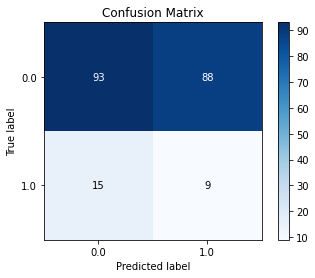

In [ ]:
# Draw the confusion matrix
def plot_cmat(y_test, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(y_test, ypred)
    plt.grid(False)
    plt.show()
    
plot_cmat(y_test, y_pred)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a2c2a1b-c190-4238-a7b0-93cabb99b4e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>